In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# 1. Convex Optimization

### Question 1

In [2]:
def f(x):
    return math.exp(x)-x

def df_dx(x):
    return math.exp(x) - 1

def df2_dx(x):
    return math.exp(x)

In [3]:
# Initialize variables
i = 0
x = -1
f_prime_x = 1 
f_dprime_x = 0

while abs(f_prime_x) > 10**-5:
    
    print("Iteration " + str(i))
    print("x_" + str(i) + " = " + str(round(x,5)))
    
    f_prime_x = df_dx(x)
    f_dprime_x = df2_dx(x)
    x = x - f_prime_x/f_dprime_x 
    
    print("f'(x_" + str(i) + ") = " + str(round(f_prime_x,5)))
    print("f''(x_" + str(i) + ") = " + str(round(f_dprime_x,5)))
    print("")
    i+=1

Iteration 0
x_0 = -1
f'(x_0) = -0.63212
f''(x_0) = 0.36788

Iteration 1
x_1 = 0.71828
f'(x_1) = 1.05091
f''(x_1) = 2.05091

Iteration 2
x_2 = 0.20587
f'(x_2) = 0.22859
f''(x_2) = 1.22859

Iteration 3
x_3 = 0.01981
f'(x_3) = 0.02001
f''(x_3) = 1.02001

Iteration 4
x_4 = 0.00019
f'(x_4) = 0.00019
f''(x_4) = 1.00019

Iteration 5
x_5 = 0.0
f'(x_5) = 0.0
f''(x_5) = 1.0



### Question 2

Iteration 0
x_0 = -1
f(x_0) = 1.36788
f'(x_0) = -0.63212

Iteration 1
x_1 = 1.16395
f(x_1) = 2.03862
f'(x_1) = 2.20257

Iteration 2
x_2 = 0.23839
f(x_2) = 1.03081
f'(x_2) = 0.26921



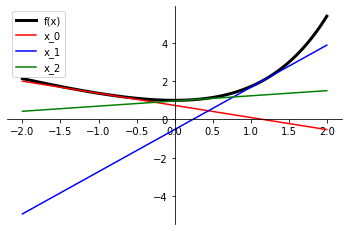

In [4]:
# Set up plot
x = np.linspace(2,-2,100)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

f2 = np.vectorize(f)
plt.plot(x, f2(x), 'k', label='f(x)', linewidth=3)

colors = ['r', 'b', 'g', 'c', 'm']

# Initialize variables
i = 0
x_k = -1
f_prime_x = 0
f_dprime_x = 0 

# Function that returns the tangent line
def tangent(x_k, f_x_k, d1):  
    return d1*(x-x_k) + f_x_k

###########################################################

for i in range(0, 3):
    
    print("Iteration " + str(i))
    print("x_" + str(i) + " = " + str(round(x_k,5)))
    
    f_x = f(x_k)
    f_prime_x = df_dx(x_k)
    
    print("f(x_" + str(i) + ") = " + str(round(f_x,5)))
    print("f'(x_" + str(i) + ") = " + str(round(f_prime_x,5)))
    print("")
    
    plt.plot(x, tangent(x_k, f_x, f_prime_x), c=colors[i], label = "x_" + str(i))
    
    # Solved for next x by setting the equation of tangent line to 0
    # x_(k+1) = -b/k + a
    x_k = -f_x/f_prime_x + x_k
    i+=1
    
leg = plt.legend()
plt.show()

# 2. Non Convex Optimization

### Question 1

In [5]:
from scipy.optimize import minimize

In [6]:
def f_1(x):
    return (1-x[0]+x[0]*x[1])**2 + (2-x[0]+x[1]*x[0]**2)**2 + (3-x[0]+x[1]*x[0]**3)**2

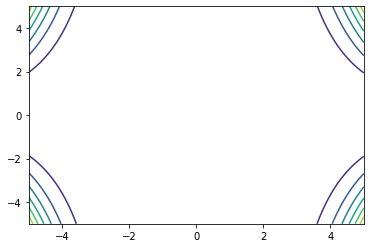

In [7]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

X, Y = np.meshgrid(x, y)
Z = f_1([X,Y])

plt.contour(X, Y, Z, cmap='viridis')

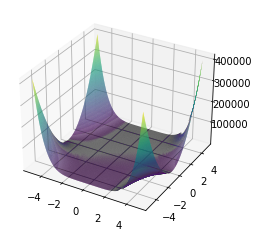

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

In [9]:
# Use minimize to solve
res = minimize(f_1, [0,0], method = 'Nelder-Mead')

In [10]:
print("Optimal Solution: (" + str(round(res.x[0],4)) + ", " + str(round(res.x[1],4)) + ")")
print("Optimal Value: " + str(round(f_1(res.x),4)))

Optimal Solution: (1.519, -0.2767)
Optimal Value: 1.1684


### Question 2

In [11]:
def f_2(x):
    return -0.0001*(abs(np.sin(x[0])*np.sin(x[1])*np.exp(abs(100 - ((x[0]**2+x[1]**2)**0.5)/math.pi))) + 1)**0.1

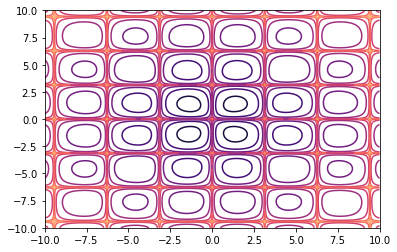

In [12]:
x_2 = np.linspace(-10, 10, 1000)
y_2 = np.linspace(-10, 10, 1000)

X_2, Y_2 = np.meshgrid(x_2, y_2)
Z_2 = f_2([X_2, Y_2])

plt.contour(X_2, Y_2, Z_2, cmap='magma')

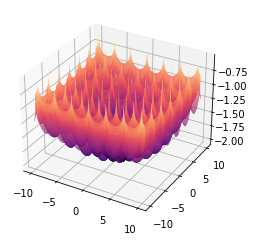

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X_2, Y_2, Z_2, rstride=1, cstride=1,
                cmap='magma', edgecolor='none')

#### Global Minima

In [14]:
res_2 = minimize(f_2, [0,0], method = 'Nelder-Mead')
print("Global Optimal Solution: (" + str(round(res_2.x[0],4)) + ", " + str(round(res_2.x[1],4)) + ")")
print("Global Optimal Value: " + str(round(f_2(res_2.x),4)))

Global Optimal Solution: (1.3494, -1.3494)
Global Optimal Value: -2.0626


In [15]:
res_3 = minimize(f_2, [1,1], method = 'Nelder-Mead')
print("Global Optimal Solution: (" + str(round(res_3.x[0],4)) + ", " + str(round(res_3.x[1],4)) + ")")
print("Global Optimal Value: " + str(round(f_2(res_3.x),4)))

Global Optimal Solution: (1.3495, 1.3494)
Global Optimal Value: -2.0626


#### Local Minima

In [16]:
res_4 = minimize(f_2, [1,-5], method = 'Nelder-Mead')
print("Local Optimal Solution: (" + str(round(res_4.x[0],4)) + ", " + str(round(res_4.x[1],4)) + ")")
print("Local Optimal Value: " + str(round(f_2(res_4.x),4)))

Local Optimal Solution: (1.4706, -4.4191)
Local Optimal Value: -1.8899
